# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name         |Campus Email                     | ID       |
|-------------|---------------------------------|----------|
|Lior Friedman| liorf@campus.technion.ac.il     | 204034953|
|Yair Nahum   | nahum.yair@campus.technion.ac.il| 034462796|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw3_id1_id2.zip` with content:
        * `ee046211_hw3_id1_id2.ipynb` - the code tasks
        * `ee046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Deep NLP Case Study](#-Question-1--Deep-NLP-Case-Study)
    * [Q2 -Layer Normalization](#-Question-2--Layer-Normalization)
    * [Q3 - Batch Normalization](#-Question-3--Batch-Normalization)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Deep NLP Case Study
---
* You are consulting for a healthcare company. They provide you with clinical notes of the first encounter that each patient had with their doctor regarding a particular medical episode.
* There are a total of 12 million patients and clinical notes. At the time that each clinical note was written, the underlying illnesses associated with the medical episode were unknown to the doctor. 
* The company provides you with the true set of illnesses associated with each medical episode and asks you to build a model that can infer these underlying illnesses using only the current clinical note and all previous clinical notes belonging to the patient.
* The set of notes provided to you span 10 years; each patient therefore can have multiple clinical notes (medical episodes) in that period.
* You also have a vector representation of each patient note (note-vector) which was built using a summation of the word vectors of the note.


1. You assume that a patient’s past medical history is informative of their current illness. As such, you apply a recurrent neural network to predict the current illness based on the patient’s current and previous note-vectors. Explain why a recurrent neural network would yield better results than a feed-forward network in which your input is the summation of past and current note-vectors?

2. A patient may have any number of illnesses from a list of 70,000 known medical illnesses. The output of your recurrent neural network will therefore be a vector with 70,000 elements. Each element in this output vector represents the probability that the patient has the illness that maps to that particular element. Illnesses are not mutually exclusive i.e. having one illness does not preclude you from having any other illnesses. Given this insight, is it better to have a sigmoid non-linearity or a softmax non-linearity as your output unit? Why?

3. You try to figure out a better way to reduce the training and testing time of your model. You perform a run time analysis and observe that the computational bottleneck is in your output unit: the number of target illnesses is too high. Each illness in the list of 70,000 illnesses belongs to one of 300 classes (e.g. a migraine belongs to the neurological disorder class). He shares with you a dictionary which maps each illness to its corresponding class. How can you use this information to reduce the **time** complexity of your model?

## <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Answer 1 - Deep NLP Case Study
---

1. The RNN structure allows us to preserve and learn the time relations between tokens/events (as in RL actions and rewards) while summation lose the chronological order between them. In RNNs usually the recent events have more significance compared to old events (BTW, in time sequences tasks like NLP, there are models that even assume Markovian assumption on next word/event probablilty).  
2. It is better to use a sigmoid as the probablility to have some illness is independent in other illnesses probabilities. If we use softmax, one probability for some illness influences the other illnesses probability as we normailize all such that the sum of all probabilities equal 1.  
   This is a multi-label classification (we can have several outputs independent on other outputs).  
3. We use the hidden layer to predict the 300 classes (As we have for each time step the illnesses we can create labels for the classes, compute a loss and train the classes predictor) we do that with some $W_{300xd_h}$ and softmax over the 300 neurons.  
   Then, we take the top N (for example=10) classes with the highest probabilities and get the opposite illnesses that might have caused these (the inverse mapping of each class).  
   From that we deduce the possible illnesses the patient might have and caculate the outputs of the RNN only on them.  
   For example, we get from the 300 classes the highest 10 classes. These classes give about $10 \times (70,000 / 300 ) = 2330 $ possible illnesses (assuming uniform distribution). On these illnesses we calculate the prediction and backprop only on them in training time.  
   Every episode of patient can give different illnesses to backprop on into the RNN.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 -Layer Normalization
---

1. When does Group Normalization is equivalent to Instance Normalization?
2. When does Group Normalization is equivalent to Layer Normalization?
3. For the following batch of $N=3$ 2D images with $C=3$ channels each, what is the output of:
    * Batch Normalization
    * Layer Normalization
    * Instance Normalization


* Use only the *mean* for the calculation, no need for the std (assume there are no learnable parameters).
    
$$ n=1: \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $$

$$ n=2: \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.5 & 0 \\ 0.5 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0.5 \\ 0 & 0.5 \end{bmatrix} $$

$$ n=3: \begin{bmatrix} 1 & 1 \\ 1 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.5 & 1 \\ 0.5 & 1 \end{bmatrix}, \begin{bmatrix} 1 & 0.5 \\ 1 & 1 \end{bmatrix} $$

## <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Answer 2 - Layer Normalization
---

1. Group normalization is equivalent to instance normalization when the group is only one channel. There is only one input channel and thus we don't compute mean and std between the different channels (per example).  
2. Group normalization is equivalent to layer normalization when the group is all the channels. Meaning, we calculate the statistics on all channels (per example).  
3.  We denote batch size with $N$, amount of channels  with $C$ and width/height of a channel with $W/H$ recpectively. The "pixels" matrix per channel is denoted as $P_c$.
* Batch Normalization:  
  We calculate the mean $\mu$ vector with respect to the batch size per channel $\forall i \in [1,2..C], \mu_i = \frac{1}{NWH}\sum_{n=1}^N \sum_{l=1}^W \sum_{m=1}^H P_i[l][m]$ with size of the amount of channels:  
$$ \mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \mu_3 \end{bmatrix} = \begin{bmatrix} \frac{7.5}{12} \\ \frac{6}{12} \\ \frac{8.5}{12} \end{bmatrix} = \begin{bmatrix} \frac{5}{8} \\ \frac{1}{2} \\ 0.7083 \end{bmatrix} $$ 
  We subtract the mean from each channel component (in general should divide also with the std) thus the outputs per example:
$$ n=1: \begin{bmatrix} -\frac{5}{8} & \frac{3}{8} \\ \frac{3}{8} & -\frac{5}{8} \end{bmatrix}, \begin{bmatrix} \frac{1}{2} & -\frac{1}{2} \\ -\frac{1}{2} & \frac{1}{2} \end{bmatrix}, \begin{bmatrix} 0.2917 & 0.2917 \\ 0.2917 & 0.2917 \end{bmatrix} $$

$$ n=2: \begin{bmatrix} -\frac{1}{8} & -\frac{1}{8} \\ -\frac{1}{8} & -\frac{1}{8} \end{bmatrix}, \begin{bmatrix} 0 & -\frac{1}{2} \\ 0 & -\frac{1}{2} \end{bmatrix}, \begin{bmatrix} -0.7083 & -0.2183 \\ -0.7083 & -0.2183 \end{bmatrix} $$

$$ n=3: \begin{bmatrix} \frac{3}{8} & \frac{3}{8} \\ \frac{3}{8} & -\frac{1}{8} \end{bmatrix}, \begin{bmatrix} 0 & \frac{1}{2} \\ 0 & \frac{1}{2} \end{bmatrix}, \begin{bmatrix} 0.2917 & -0.2183 \\ 0.2917 & 0.2917 \end{bmatrix} $$
* Layer Normalization:  
  We calculate the mean $\mu$ vector with respect to the examples dimensions $\forall i \in [1,2..N], \mu_i = \frac{1}{CWH}\sum_{c=1}^C \sum_{l=1}^W \sum_{m=1}^H P_c[l][m]$:  
$$ \mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \mu_3 \end{bmatrix} = \begin{bmatrix} \frac{2}{3} \\ \frac{1}{3} \\ \frac{5}{6} \end{bmatrix}$$ 
  We subtract the mean from each batch example component (in general should divide also with the std) thus the outputs per example:
$$ n=1: \begin{bmatrix} -\frac{2}{3} & \frac{1}{3} \\ \frac{1}{3} & -\frac{2}{3} \end{bmatrix}, \begin{bmatrix} \frac{1}{3} & -\frac{2}{3} \\ -\frac{2}{3} & \frac{1}{3} \end{bmatrix}, \begin{bmatrix} \frac{1}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{1}{3} \end{bmatrix} $$

$$ n=2: \begin{bmatrix} \frac{1}{6} & \frac{1}{6} \\ \frac{1}{6} & \frac{1}{6} \end{bmatrix}, \begin{bmatrix} \frac{1}{6} & -\frac{1}{3} \\ \frac{1}{6} & -\frac{1}{3} \end{bmatrix}, \begin{bmatrix} -\frac{1}{3} & \frac{1}{6} \\ -\frac{1}{3} & \frac{1}{6} \end{bmatrix} $$

$$ n=3: \begin{bmatrix} \frac{1}{6} & \frac{1}{6} \\ \frac{1}{6} & -\frac{1}{3} \end{bmatrix}, \begin{bmatrix} -\frac{1}{3} & \frac{1}{6} \\ -\frac{1}{3} & \frac{1}{6} \end{bmatrix}, \begin{bmatrix} \frac{1}{6} & -\frac{1}{3} \\ \frac{1}{6} & \frac{1}{6} \end{bmatrix} $$
* Instance Normalization:  
  We calculate the mean $\mu$ vector with respect to the examples dimensions and per channel $\forall i \in [1,2..N], \forall c \in [1,2..C], \mu_{i,c} = \frac{1}{WH}\sum_{l=1}^W \sum_{m=1}^H P_c[l][m]$:
$$ \mu = \begin{bmatrix} \frac{1}{2} & \frac{1}{2} & 1 \\ \frac{1}{2} & \frac{1}{4} & \frac{1}{4} \\ \frac{7}{8} & \frac{3}{4} & \frac{7}{8} \end{bmatrix}$$ 
  We subtract the mean from each batch example component per component (in general should divide also with the std) thus the outputs:
  $$ n=1: \begin{bmatrix} -\frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} \end{bmatrix}, \begin{bmatrix} \frac{1}{2} & -\frac{1}{2} \\ -\frac{1}{2} & \frac{1}{2} \end{bmatrix}, \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix} $$

$$ n=2: \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}, \begin{bmatrix} \frac{1}{4} & -\frac{1}{4} \\ \frac{1}{4} & -\frac{1}{4} \end{bmatrix}, \begin{bmatrix} -\frac{1}{4} & \frac{1}{4} \\ -\frac{1}{4} & \frac{1}{4} \end{bmatrix} $$

$$ n=3: \begin{bmatrix} \frac{1}{8} & \frac{1}{8} \\ \frac{1}{8} & -\frac{3}{8} \end{bmatrix}, \begin{bmatrix} -\frac{1}{4} & \frac{1}{4} \\ -\frac{1}{4} & \frac{1}{4} \end{bmatrix}, \begin{bmatrix} \frac{1}{8} & -\frac{3}{8} \\ \frac{1}{8} & \frac{1}{8} \end{bmatrix} $$



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 -Batch Normalization
---
This question relates to lectures 8-9 (from slide 9):

Prove that **without** regularization, BatchNorm **scale invariance** for parameters $\mathbf{w}$ implies:
1. $\nabla \mathcal{L}(\mathbf{w})^T\mathbf{w} = 0$
2. And under gradient flow dynamics ($\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w})$) this implies (L2) norm conservation: $\forall t: ||\mathbf{w}(t)||^2 = C$

Hint: see results from the multilayer networks lecture.

## <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Answer 3 - Batch Normalization
---

1. Since the BN layer is invariant to scale of $\mathbf{w}$ we get:
  $\mathcal{L}(\mathbf{w})= \mathcal{L}(\alpha\mathbf{w})$
  As we saw in lectures, we can build conservation laws if $\mathcal{L}(\mathbf{w}) = \mathcal{L}(\psi_{\alpha}\mathbf{w})$ by applying dervative with respect ot the parameter $\alpha$:
  $$0 \underbrace{=}_{(1)} \frac{∂}{∂\alpha}\mathcal{L}(\alpha\mathbf{w}) = \nabla \mathcal{L}(\alpha\mathbf{w})^T\frac{∂}{∂\alpha}(\alpha\mathbf{w}) = \nabla \mathcal{L}(\alpha\mathbf{w})^T\mathbf{w} \underbrace{=}_{(2)} \nabla \mathcal{L}(\mathbf{w})^T\mathbf{w}$$
  When (1) is by applying the derivative with respect to scale $\alpha$ on both sides of the equation $\mathcal{L}(\mathbf{w})= \mathcal{L}(\alpha\mathbf{w})$ and (2) is due to the Loss invarinace with respect to $\alpha$.  
  $\blacksquare$
2. Using the fact that under gradient flow dynamics with small learning rate we have $\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w})$, We subtitute the loss gradient in the previous section and apply integration over time:
$$ 0 =  \frac{1}{\eta}\nabla \mathcal{L}(\mathbf{w})^T\mathbf{w} = -\dot{\mathbf{w}}^T\mathbf{w} ⇒ 0 =\dot{\mathbf{w}}^T\mathbf{w} ⇒ 0 = \frac{1}{2}\frac{d}{dt}||\mathbf{w}(t)||^2 ⇒ C=||\mathbf{w}(t)||^2, ∀t$$  
  $\blacksquare$


### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [1]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math

# pytorch
import torch
import torch.nn as nn
import torchtext
import torchtext.legacy.data as data
import torchtext.legacy.datasets as datasets
import torch.nn.functional as f
from torch.nn import TransformerEncoder, TransformerEncoderLayer

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Initialize a text `data.Field` using `data.utils.get_tokenizer("basic_english")`, `<sos>` and `<eos>` as start and end tokens, and consider only lower case words (`lower=True`).
2. Load the train, valid and test *texts* using `datasets.WikiText2.splits` with your text data field from (1).
3. Build a vocabulary using only the train data.
4. Create the train, valid and test data using the provided `batchify` function.
5. Use the `batchify` function with `batch_size=20` to create a data loader. Print the shape of the result.
6. Print 2 train samples. Use the vocabulary you built to transfer between tokens to words.

In [2]:
def batchify(data, bsz, text_field):
    data = text_field.numericalize([data.examples[0].text])
    # Divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

### <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Task 1 Code and Answers  - Loading and Observing the Data
---

We have printed 2 samples over the batch dimension (the starting word in each sample after split to batches) and also the sentences parts that (vertical order due to transpose in batchify) start each sample in the batch.

In [3]:
"""
Your Code Here
"""

BATCH_SIZE = 20

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# define a text field
tokenizer = data.utils.get_tokenizer("basic_english")
text_field = data.Field(sequential=True, init_token="<sos>", eos_token="<eos>",
                  tokenize=tokenizer, lower=True, dtype=torch.long)
#datasets.WikiText2.download('./datasets')
ds_train, ds_valid, ds_test = datasets.WikiText2.splits(text_field)

#print(ds_test.examples[0].text_field[:20])

text_field.build_vocab(ds_train)
vocab = text_field.vocab

train_data = batchify(ds_train, bsz=BATCH_SIZE, text_field=text_field)
valid_data = batchify(ds_valid, bsz=BATCH_SIZE, text_field=text_field)
test_data = batchify(ds_test, bsz=BATCH_SIZE, text_field=text_field)

print(f"train size: {train_data.size()}")
print(f"valid size: {valid_data.size()}")
print(f"test size: {test_data.size()}")
print()

def print_batch_dim_sample(data_set, index):
  sample_str = " ".join([vocab.itos[t] for _,t in enumerate(data_set[index].cpu().numpy())])
  print(f"{sample_str}")

def print_sample(data_set, index, num_of_words):
  sample_str = " ".join([vocab.itos[t] for _,t in enumerate(data_set.t()[index][:num_of_words].cpu().numpy())])
  print(f"{sample_str}")

print("2 samples of batch dim:")
print_batch_dim_sample(train_data,0)
print_batch_dim_sample(train_data,1)

print()
# we print the first 15 words in each sample after split to batches examples
print_len = 15
print(f"2 samples of sentences (transposed matrix). cut length to {print_len}:")
print_sample(train_data,0,print_len)
print_sample(train_data,1,print_len)


downloading wikitext-2-v1.zip


100%|██████████| 4.48M/4.48M [00:01<00:00, 3.05MB/s]


extracting
train size: torch.Size([104335, 20])
valid size: torch.Size([10908, 20])
test size: torch.Size([12310, 20])

2 samples of batch dim:
<eos> @ settlement heavy of , , lined the she <unk> of . interception the dried . , would his
= 1 was rains ireland and starting with hairy had found the <unk> to possibility heads other which receive gift

2 samples of sentences (transposed matrix). cut length to 15:
<eos> = valkyria chronicles iii = <eos> <eos> senjō no valkyria 3 <unk> chronicles (
@ 1 rebounds , 3 @ . @ 8 assists , and 1 @ .


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a" as input, and "nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Print a sample from `data` and `target`

### <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Task 2 Code and Answers  - Separating to Inputs and Targets
---

We've split to target that is with one word delay after the input and flattened it. We can see that the second word in each batch match the targets' first words.

In [4]:
"""
Your Code Here
"""
def get_batch(source, i, bptt):
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[(i+1):(i+1+seq_len)].view(-1)
    return data, target

data, target = get_batch(test_data, i=0, bptt=2)

print(f"data size is {data.size()}")
print(f"target size is {target.size()}")

print(f"data sample 0 bare numbers:\n {data[0]}")
print(f"data sample 0 in text:")
print_batch_dim_sample(data, 0)
print(f"\ndata sample 1 bare numbers:\n {data[1]}")
print(f"data sample 1 in text:")
print_batch_dim_sample(data, 1)
print(f"\ntarget bare numbers:\n {target}")
print(f"target in text:")
print_batch_dim_sample(target.view(2,20), 0)

data size is torch.Size([2, 20])
target size is torch.Size([40])
data sample 0 bare numbers:
 tensor([    3, 21014,     8,   835,  1283,   220,     9,   197,   195,   123,
          737,    11,    20,   911,     8,    77,     5,     0,  1445,    77],
       device='cuda:0')
data sample 0 in text:
<eos> catapult and already bodies league in june due against praised a for decision and up , <unk> coming up

data sample 1 bare numbers:
 tensor([  12,    8,  402, 2358,   69,  510,    4,  392,   10,    0,    4, 3415,
           4,  117, 3857,   10,  638,  454, 2613,    9], device='cuda:0')
data sample 1 in text:
= and service stopped while cup the 2012 to <unk> the stable the early 63 to brought building 11th in

target bare numbers:
 tensor([   12,     8,   402,  2358,    69,   510,     4,   392,    10,     0,
            4,  3415,     4,   117,  3857,    10,   638,   454,  2613,     9,
          635,    11,  1053,  1067,    16,     5,   117,     5,     0,     0,
        12560,   286,  2104

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)`
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [5]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

### <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Task 3 Code and Answers  - Define Hyperparameters and Initialize the Model
---

Selcting the hyper parameters, creating the model and print all.

In [6]:
"""
Your Code Here
"""
hyper_params = {}
#Embedding size: choose from `[200, 250]`
hyper_params['EMBED_SIZE'] = 200
#Number of hidden units: choose from `[200, 250]`
hyper_params['HIDDEN_UNITS'] = 200
#Number of layers: choose from `[2, 4]`
hyper_params['LAYERS'] = 2
#Number of attention heads: choose from `[2, 4]`
hyper_params['ATTENTION_HEADS'] = 2
#Dropout: choose from `[0.0, 0.3]`
hyper_params['DROPOUT'] = 0.2
#Optimizer: choose from `[SGD, Adam]`
hyper_params['OPTIMIZER'] = 'sgd'
#Learning rate: choose from `[5e-3, 5.0]`
hyper_params['LR'] = 5.0
#Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)`
hyper_params['SCHED_GAMMA'] = 0.95
hyper_params['SCHED_STEP_SIZE'] = 1.0
hyper_params['EPOCHS'] = 25

print("The hyper parameters:")
print(hyper_params)

num_of_tokens = len(text_field.vocab.stoi)

criterion = nn.CrossEntropyLoss()

model = TransformerModel(
    ntoken=num_of_tokens,
    ninp=hyper_params['EMBED_SIZE'],
    nhead=hyper_params['ATTENTION_HEADS'],
    nhid=hyper_params['HIDDEN_UNITS'],
    nlayers=hyper_params['LAYERS'],
    dropout=hyper_params['DROPOUT']).to(device)

print("The model:")
print(model)

if hyper_params['OPTIMIZER'] == 'sgd':
    optimizer = torch.optim.SGD(model.parameters(), lr=hyper_params['LR'])
else:
    optimizer = torch.optim.AdamW(model.parameters(), lr=hyper_params['LR'])

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, hyper_params['SCHED_STEP_SIZE'], gamma=hyper_params['SCHED_GAMMA'], verbose=True)


The hyper parameters:
{'EMBED_SIZE': 200, 'HIDDEN_UNITS': 200, 'LAYERS': 2, 'ATTENTION_HEADS': 2, 'DROPOUT': 0.2, 'OPTIMIZER': 'sgd', 'LR': 5.0, 'SCHED_GAMMA': 0.95, 'SCHED_STEP_SIZE': 1.0, 'EPOCHS': 25}
The model:
TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=200, out_features=200, bias=True)
        )
        (linear1): Linear(in_features=200, out_features=200, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=200, out_features=200, bias=True)
        (norm1): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inp

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [7]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    ntokens = len(text_field.vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, bptt):
            data, targets = get_batch(data_source, i, bptt)
            if data.size(0) != bptt:
                src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
            output = eval_model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * criterion(output_flat, targets).item()
    return total_loss / (len(data_source) - 1)

### <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Task 4 Code and Answers  - Train and Evaluate the Language Model
---


In [8]:
"""
Your Code Here
"""
def train(bptt):
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()
    ntokens = len(text_field.vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        
        if data.size(0) != bptt:
            src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
            
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)
        
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = 200
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.2f} | ms/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // bptt, scheduler.get_last_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def save_checkpoint_model(hyper_params, valid_loss, model, epoch):
    torch.save({'hyper_params': hyper_params,
                  'valid_loss' : valid_loss,
                  'state_dict': model.state_dict()},
               f'{epoch}_checkpoint.pth')

def load_checkpoint_model(epoch):
    filename = f'{epoch}_checkpoint.pth'
    checkpoint = torch.load(filename)
    loaded_hyper_params = checkpoint['hyper_params']
    #print(f"loaded_hyper_params {loaded_hyper_params}")
    loaded_valid_loss = checkpoint['valid_loss']
    loaded_model = TransformerModel(
        ntoken=num_of_tokens,
        ninp=loaded_hyper_params['EMBED_SIZE'],
        nhead=loaded_hyper_params['ATTENTION_HEADS'],
        nhid=loaded_hyper_params['HIDDEN_UNITS'],
        nlayers=loaded_hyper_params['LAYERS'],
        dropout=loaded_hyper_params['DROPOUT']).to(device)
    loaded_model.load_state_dict(checkpoint['state_dict'])
    return loaded_hyper_params, loaded_valid_loss, loaded_model




In [9]:
# The training loop
bptt=35
valid_losses = []
ppls = []
min_valid_loss = np.Inf
min_loss_epoch = -1

for epoch in np.arange(1, hyper_params['EPOCHS'] + 1):

    e_start_time = time.time()
    train(bptt)
    valid_loss = evaluate(model, valid_data)
    valid_losses.append(valid_loss)

    ppl = np.exp(valid_loss)
    ppls.append(ppl)

    epoch_elapsed = time.time() - e_start_time

    print(f"| *** done epoch {epoch} | valid loss {valid_loss:5.4f} | ppl {ppl:8.2f} | elapsed {epoch_elapsed}")

    if valid_loss < min_valid_loss:
        print('==> Saving checkpoint for the lowest validation loss model ...', end =" ")
        save_checkpoint_model(hyper_params, valid_loss, model, epoch)
        print("Done saving")      
        min_loss_epoch = epoch
        min_valid_loss = valid_loss

    scheduler.step()

| epoch   1 |   200/ 2981 batches | lr 5.00 | ms/batch 36.79 | loss  8.04 | ppl  3101.84
| epoch   1 |   400/ 2981 batches | lr 5.00 | ms/batch 35.20 | loss  6.81 | ppl   904.24
| epoch   1 |   600/ 2981 batches | lr 5.00 | ms/batch 35.29 | loss  6.37 | ppl   585.15
| epoch   1 |   800/ 2981 batches | lr 5.00 | ms/batch 35.25 | loss  6.23 | ppl   510.19
| epoch   1 |  1000/ 2981 batches | lr 5.00 | ms/batch 35.38 | loss  6.13 | ppl   457.52
| epoch   1 |  1200/ 2981 batches | lr 5.00 | ms/batch 35.56 | loss  6.09 | ppl   440.83
| epoch   1 |  1400/ 2981 batches | lr 5.00 | ms/batch 35.52 | loss  6.04 | ppl   418.03
| epoch   1 |  1600/ 2981 batches | lr 5.00 | ms/batch 35.48 | loss  6.05 | ppl   423.50
| epoch   1 |  1800/ 2981 batches | lr 5.00 | ms/batch 35.74 | loss  5.96 | ppl   388.52
| epoch   1 |  2000/ 2981 batches | lr 5.00 | ms/batch 35.82 | loss  5.96 | ppl   386.23
| epoch   1 |  2200/ 2981 batches | lr 5.00 | ms/batch 36.17 | loss  5.85 | ppl   347.26
| epoch   1 |  2400/ 

In [10]:
# test set evaluation

_, _, best_model = load_checkpoint_model(min_loss_epoch)

test_loss = evaluate(best_model, test_data)
test_ppl = np.exp(test_loss)
print(f"The test loss is {test_loss}")
print(f"The test perplexity is {test_ppl}")


The test loss is 5.307821884135129
The test perplexity is 201.9099657909663


<Figure size 2880x2880 with 0 Axes>

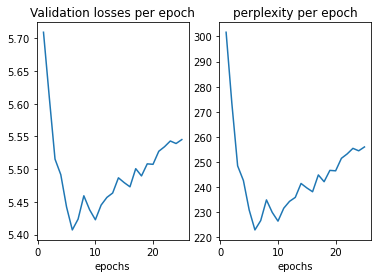

In [11]:
fig = plt.figure(figsize=(40, 40))
_, axes = plt.subplots(1, 2)

x = range(1, hyper_params['EPOCHS'] + 1)

axes[0].set_title("Validation losses per epoch")
axes[0].set_xlabel("epochs")
axes[0].plot(x, valid_losses)

axes[1].set_title("perplexity per epoch")
axes[1].set_xlabel("epochs")
axes[1].plot(x, ppls)


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [12]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab.stoi)
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = vocab.itos[word_idx]
            words.append(word)
    return words

### <img src="https://img.icons8.com/fluency/48/000000/exclamation-mark.png" style="height:50px;display:inline">  Task 5 Code and Answers  - Generate Sentences
---

In [14]:
"""
Your code Here
"""
def print_sentence(words):
    sentence = " ".join([t for _,t in enumerate(words)])
    print(f"{sentence}")

for j in [1, 3, 6]:
    print(f"\nload checkpoint in training of epoch {j} and generate 3 sentences:")
    _, _, loaded_model = load_checkpoint_model(j)
    for i in range(3):
        words = generate(loaded_model, vocab)
        print_sentence(words)



load checkpoint in training of epoch 1 and generate 3 sentences:
stars are name in <unk> of the practices in the national evolution of the key . the initial lucrative patronage officials ) can be these night trachodon five befriended the facial feather <unk> such 1145 are has been used by class areas led by an interest when the future airborne by the choice dragon . <eos> <unk> philippines in this surface plumes and hope poor within some brethren of local areas of japan ( <unk> in habitat and armed , it , 2022 <unk> studies and sounded observed until sort of an average words of a vargas that pedestrian hot
done to enter and an estimated at its eater to cross was named on orozco still associated with the adult birds for another no evolves while either three years of the major impact on robby for <unk> 767 men have been <unk> freeman , along with the first three <unk> , such as two times waterproofing of some characters conform its development in the kpa ' s design or land sharing , and

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/